In [1]:
from load_data import *
from models import *
from utils import *
from collections import defaultdict


import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/work/u7412932/myenv/.package_yolov7_v2_nchc_conda/envs/yolov7_v2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
def Confusionmatrix(mode):
    true_labels = []
    pred_labels = []
    
    if mode=='EfficientNetB0':
        model=EfficientNetB0()
    elif mode=='DenseNet121':
        model=DenseNet121()
    elif mode=='Resnet50':
        model=Resnet50()
    else:
        print("錯誤: mode 必須是 ['EfficientNetB0', 'DenseNet121', 'Resnet50'] 之一")
        return
        
    model = load_model(model, 'weights/{}_best.pt'.format(mode), device)
    model.eval()
    with torch.no_grad():
        for data in val_data_loader:
            image = data['image'].to(device)
            label = data['label'].long().to(device)
            prob_vec, preds= model(image)
            true_labels.extend(label.cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())
            
    return true_labels,pred_labels

✅ 成功載入模型，來自 epoch: 7
valid_loss_min: 0.001977，valid_accuracy_max: 0.986166
✅ 成功載入模型，來自 epoch: 20
valid_loss_min: 0.000757
✅ 成功載入模型，來自 epoch: 21
valid_loss_min: 0.002790，valid_accuracy_max: 0.974308


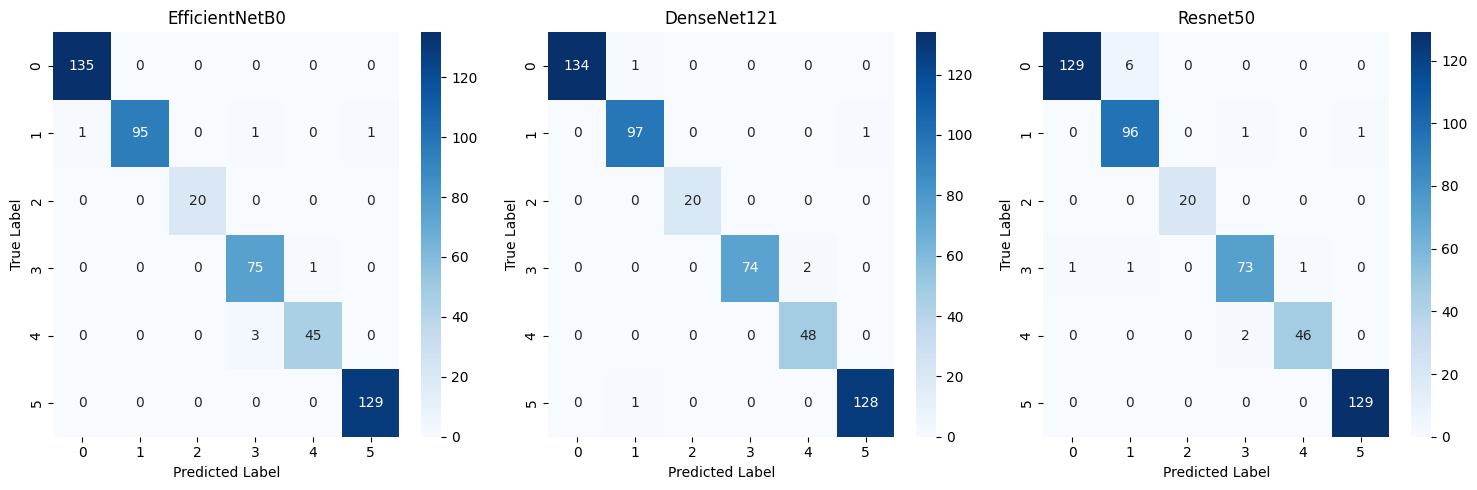

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
label_dict = {
    0: "normal",
    1: "void",
    2: "horizontal defect",
    3: "vertical defect",
    4: "edge defect",
    5: "particle"
}
class_names=[i for i in range(6)]
for id,mode in enumerate(['EfficientNetB0', 'DenseNet121', 'Resnet50']):
    true_labels, pred_labels=Confusionmatrix(mode)
    cm = confusion_matrix(true_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=ax[id])
    ax[id].set_xlabel("Predicted Label")
    ax[id].set_ylabel("True Label")
    ax[id].set_title(mode)
plt.tight_layout()
plt.show()